# To predict diabetes using Pima Indians Diabetes Dataset

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Importing & Loading the dataset

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data['Glucose'].max()

199

### Data information:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Dataset Shape:

In [6]:
data.shape

(768, 9)

### Dataset Description:

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Checking the Missing Values

In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Exploratory Data Analysis

<AxesSubplot:xlabel='Outcome', ylabel='count'>

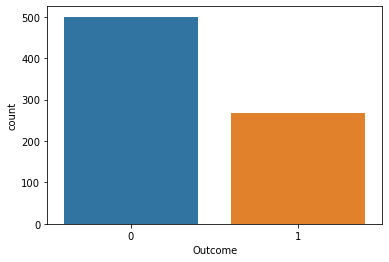

In [12]:
sns.countplot(x="Outcome",data=data)

The outcome 1 indicates the person is suffering from diabetes and 0 indicates not suffering from diabetes

In [13]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Class variable (0 or 1) 268 of 768 are 1, the others are 0

### Display the Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix (for diabetes prediction)')

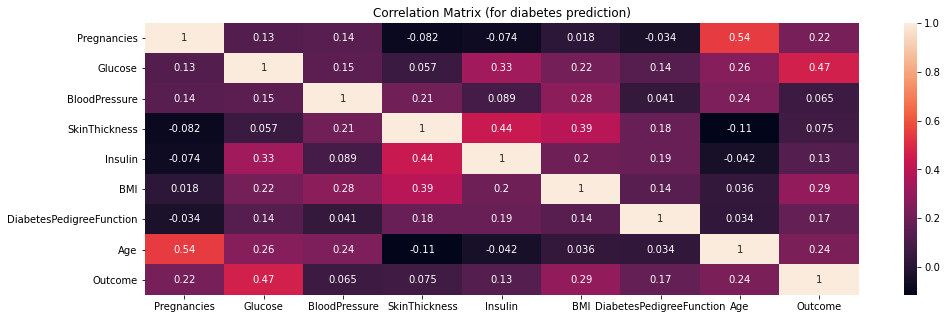

In [14]:
plt.figure(figsize=(16,5))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Matrix (for diabetes prediction)')

From the above figure, we can see that Glucose (Independent Variable) has the maximum correlation with Outcome (Dependent Variable). Which denotes that the Outcome is heavily dependent on the Glucose.

### Data Splitting

In [15]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

### Importing Packages for Classification algorithms

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### Logistic Regression (LR)

In [17]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

lr_prediction = lr_model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.7445887445887446


C:\Users\Sai Nath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Support Vector Machine (SVM)

In [18]:
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)

svc_prediction = svm_model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction,y_test))

SVM accuracy =  0.70995670995671


### Decision Tree

In [19]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

dt_prediction = dt_model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(dt_prediction,y_test))

Decision Tree accuracy =  0.7056277056277056


### K-Nearest Neighbors (KNN)

In [20]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

knn_prediction =knn_model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(knn_prediction,y_test))

KNN accuracy =  0.6926406926406926


### Random Forest

In [21]:
rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_model.fit(X_train, y_train)

rf_prediction=rf_model.predict(X_test)
print('random forest accuracy = ',metrics.accuracy_score(rf_prediction,y_test))

random forest accuracy =  0.6883116883116883


### CONCLUSION:

1.The Outcome is heavily dependent on the Glucose for Predictions.

2.The Logistic Regression algorithm gives us the maximum Accuracy (74% approx) compared to the other 4 Machine Learning Classification Algorithms.

In [21]:
import pickle
pickle.dump(lr_model,open('model.pkl','wb'))